# ConvNet Implementation by Keras

In [1]:
import numpy as np
import keras
from keras import layers

2024-09-11 11:34:52.140366: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-11 11:34:52.418453: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-11 11:34:54.209858: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-11 11:34:54.449333: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-11 11:34:54.598264: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

## Prepare test data

In [2]:
# hyper parameters
num_classes = 10
input_shape = (28, 28, 1)

# load test data and split it as train set and test set.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Scale image to [0, 1] for all input x data
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# make sure images have the same input dimension with (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_train, -1)
print("x_train shape:", x_train.shape)
print("train samples:", x_train.shape[0])
print("test samples:", x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
train samples: 60000
test samples: 60000


## Build test model

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         4,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,258 (20.54 KB)

 Trainable params: 5,258 (20.54 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [ ]:
batch_size = 8
epochs = 3
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

## Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Data insight view

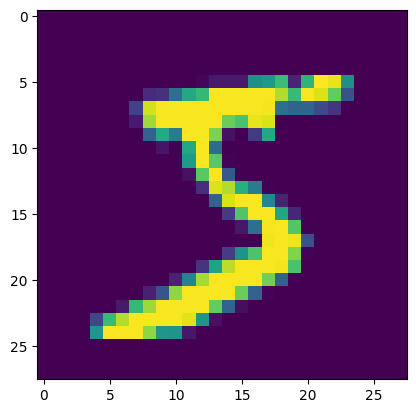

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])